# Workshop : introduction to machine learning <br> Lesson 1 : linear regression and classification

## I - Introduction to machine learning

Today machine learning is talked about all over the news. It has become widely famous in 2016 when Alpha Go, Google Deepmind's AI, has managed to win against the best player in Go of the world.

![Alpha Go against Lee Se-dol](https://media.wired.com/photos/592720e2cefba457b079c319/master/w_2400,c_limit/GW20160133774.jpg)
<i>Lee Se-Dol versus Alpha Go in 2016</i>

It is today one of the hottest topic, and it still manages to impress us every day, whether it is used in medecine, image recognition, or even content generation.

We can see here another achievement of AI : being able to transform a zebra into an horse in a picture and vice-versa : 

![Cycle Gan](https://cdn0.tnwcdn.com/wp-content/blogs.dir/1/files/2017/04/Screen-Shot-2017-04-19-at-12.41.26-796x371.png)
<i>Cycle GAN turning an horse into a zebra</i>

But the question that arises then is : what is machine learning ?

## II - The root of all machine learning : the regression task

### A simple principle

To explain how it works, we can simply say that the machine learning is simply the act of making a machine learn how to do something, rather than code with if and else how the machine should behave.

So in general, a machine learning setup is where we have **observations**, which are used to predict a **target**, and the performance of the machine is given by a **metric**.

### The theory

More formally, suppose we have a dataset $X = (x_1,...x_n)$ with each $x_i \in \mathbb{R}^p$. Here each $x_i$ represents an observation, it can be a row in a database, an individual, or a signal, and it has $p$ features. For instance for a person it can be her age, sex, location, etc ... Here we thus have that $X \in \mathbb{R}^{n * p}$
 
 We also usually have a target $y = (y_1,...,y_n)$ which is often called the **dependent variable** . For instance it could be the rating for a credit agency that an insurance company has.
 
 The goal in machine learning is to find a function $f : \mathbb{R}^p \rightarrow \mathcal{Y}$, such that for all observation $x_i$, we have that $\hat{y_i} = f(x_i) = y_i$.
 
 Here $\hat{y_i}$ is called the prediction. Therefore our objective here is to find a function $f$ that is able to predict $y_i$ given $x_i$.
 
 So one example of machine learning task would be to try to predict whether a tumor is malignant or benign, given the patient record, with for instance, age, sex, number of hospitalizations, whether she is a smoker or not, etc ...
 
 In this setting, suppose we have the following dataset : 
 1. Patrick is 50 years old, and he had a 5 months tumor, it was malignant
 2. Alice is 22, and has a 1 month tumor, it was benign
 
 
 Then the dataset would be $x_{1} = (50,5)$ and $x_2 = (22,1)$, the target variable are $y_1 = 1$ and $y_2 = 0$ (here we consider that a tumor is malignant if the observed $y$ is 1). Here our goal will be to predict $y$ given $x$, or put simply, whether or not the tumor is malignant given the age of the patient and the age of the tumor.
 
 Now we make a distinction between predicting a real value, such as a price, an area, etc ... versus predicting a discrete value such as age, a binary value, or whether a picture is a cat or not.
 
 ### The regression
 
 #### The model
 
We saw before the general context of doing machine learning, predicting a variable $y$ based on observation $x$. Here we will suppose $y$ is real valued, therefore it can take any value in $\mathbb{R}$.

The simplest setting is the context of linear regression. We suppose that we have a point cloud and we want to fit the simplest model possible : a straight line that will be "closest" to the points.

![Texte alternatif…](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png)
*Example of linear regression*

In this simple example we have that $X = (x_1,...,x_n) \in \mathbb{R}^n$ and $y = (y_1,...,y_n)\in \mathbb{R}^n$.
We know that the equation of a line is simply $\hat{y} = ax + b$. Our goal here is therefore to find *a* and *b* such that the line $\hat{y}$ is the best fit to our data.

But the question is then, how do we infer them from our data ?

#### The loss function

One approach is to first randomly sample $a$ and $b$ and then see how our predictions $\hat{y_i}$ do against true observations $y_i$. To evaluate this we will use a **loss function** which quantifies how much our model is performing compared to the real observations.

$\mathcal{L}(a,b|y) = \frac{1}{n} \sum_{i = 1}^{n} (y_i - \hat{y_i})^2 = \frac{1}{n} \sum_{i = 1}^{n} (y_i - (a x_i + b))^2$

Now our goal is simply to solve this problem :

$\underset{a,b}{\arg \min}  \frac{1}{n} \sum_{i = 1}^{n} (y_i - (a x_i + b))^2$ 

This means that we want to find the parameters $a$ and $b$ such that the average squared error between the prediction and the observation is as low as possible.

To solve this, we will look at optimization, and more specifically at optimization with Gradient Descent.

#### The optimization 

Optimizing a function is often a difficult problem, but in the case of convex functions, there are nice theorems and algorithms that insure convergence to a minimum.

The simple idea behind convex functions is that they act as "bowls", and when they have a minimum it is unique, and also if we start at a given point $x$ of the convex function $f$, $-\nabla f(x)$ gives the direction towards the minimum.

The following drawing helps understand this intuition with a convex function.
![alt text](https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND.)

So now, to find the best $a$ and $b$ that make our line closest to our observations, we just have to compute the gradient of $L$ on a given point $(a,b)$, and then update the weights with the formula :

$w = w - \alpha \nabla L(w)$

Here $\alpha$ is the **step** of our gradient descent, which means how much we decide to pursue this direction. If we make $\alpha$ too large we might overshoot and miss the minimum, if we make it too small it might take some time to reach the minimum.

Here is an illustration :

![alt text](https://cdn-images-1.medium.com/max/1600/0*QwE8M4MupSdqA3M4.png)

#### Recap

So now we have everything to make our machine learning algorithm work :

<ol>
  <li>A labeled dataset of observations $(x_i,y_i)$</li>
  <li>A model on this dataset : $\hat{y_i} = a x_i + b_i$</li>
  <li>A metric to evaluate the performance : $L(a,b) = \frac{1}{n} \sum_{i = 1}^{n} (y_i - (a x_i + b))^2$</li>
  <li>An optimization algorithm to find the best parameters to minimize the loss : $w = w - \alpha \nabla L(w)$ (here $ w = (a,b)$)</li>
  </ol>
 
 Those 4 steps are always the same for any data science project and are the building blocks for any machine learning project.
 
 ### III - Coding your first model 
 
 We will now code our first model from scratch with only numpy !
 
 First we will create a fake dataset
 

 
 
  


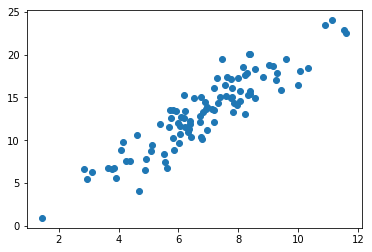

In [125]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# First we sample x
mu_x = 7
scale_x = 2
n = 100
x = np.random.normal(loc = mu_x,scale = scale_x,size = n)

# Then we sample y
scale_y = 2
y = np.random.normal(loc = x * 2,scale = scale_y)

# Finally we plot the points
plt.scatter(x,y)

We now have completed the first task : having a dataset of $(x_i,y_i)$

Now we will create a model to predict $y$ given $x$.

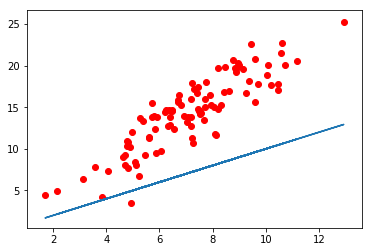

In [2]:
# Linear prediction
def predict(x,a,b):
    return x * a + b


# We first set them arbritarily
a = 1
b = 0

# Then we predict with the random values
pred = predict(x,a,b)

plt.plot(x,pred)
plt.scatter(x,y, c = "r")

In [3]:
def l2_loss(y,pred):
    l = (y - pred) ** 2
    l = np.mean(l) / 2
    
    return l

In [4]:
def grad(x,y,pred):
    err = pred - y
    
    grad_a = np.dot(x,err) / n
    grad_b = np.sum(err) / n
    
    return grad_a, grad_b

In [5]:
def gradient_descent(a,b,grad_a,grad_b, alpha = 0.001):
    
    a = a - alpha * grad_a
    b = b - alpha * grad_b
    
    return a,b

In [6]:
n_epoch = 100

for i in range(n_epoch):
    pred = predict(x,a,b)
    
    loss = l2_loss(y,pred)
    
    grad_a, grad_b = grad(x,y,pred)
    
    a, b = gradient_descent(a,b,grad_a,grad_b)
    
    if i % 10 == 0:
        print(f"Loss at epoch {i} : {loss}")

Loss at epoch 0 : 30.03420138868281
Loss at epoch 10 : 11.013792319140416
Loss at epoch 20 : 5.0036085561129955
Loss at epoch 30 : 3.1044667490205087
Loss at epoch 40 : 2.504354413753144
Loss at epoch 50 : 2.314716511109644
Loss at epoch 60 : 2.2547825743168417
Loss at epoch 70 : 2.2358332201643645
Loss at epoch 80 : 2.2298344141177937
Loss at epoch 90 : 2.227927809046326


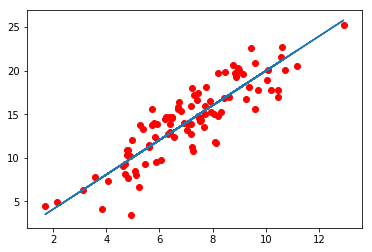

In [7]:
plt.plot(x,pred)
plt.scatter(x,y, c= "r")

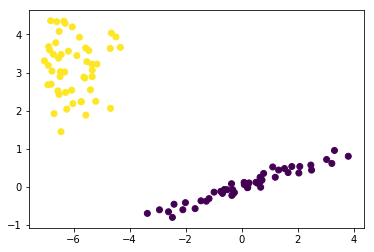

In [171]:
# Generate random sample, two components
n_samples = 50
np.random.seed(0)

C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# First samples are set to zeros,then 1
y = np.stack([np.zeros(n_samples),np.ones(n_samples)],axis=0)
y = y.reshape(n_samples*2)

# We plot it
plt.scatter(X[:,0],X[:,1],c=y.reshape(100))

In [172]:
# Function to get the y coord from the x coord
def coord_y(x,W,b):
    y = (-b - W[0] * x) / W[1]
    return(y)

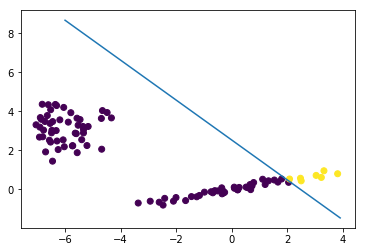

In [175]:
# We initialize randomly our parameters
W = np.random.randn(2,1)
b = np.random.randn(1)

# We get the label by assigning 1 to those with probability > 0.5
label = (forward(X,W,b) > 0.5).reshape(-1).astype(int)

# We get points to plot the decision boundary
x = np.arange(-6,4,0.1)
y_x = coord_y(x,W,b)

# We plot the scatter and the line
plt.scatter(X[:,0],X[:,1],c=label)
plt.plot(x,y_x)

Epoch 0 with loss : 0.7288770446637888
Epoch 100 with loss : 0.6103323681535215
Epoch 200 with loss : 0.518593122254319
Epoch 300 with loss : 0.4431291450384863
Epoch 400 with loss : 0.3809560469611993
Epoch 500 with loss : 0.32984475354723825
Epoch 600 with loss : 0.28783676335304836
Epoch 700 with loss : 0.2532312319104959
Epoch 800 with loss : 0.2245968705416791
Epoch 900 with loss : 0.20076079617539355
Epoch 1000 with loss : 0.1807797065268902
Epoch 1100 with loss : 0.16390372213116058
Epoch 1200 with loss : 0.14954025952875752
Epoch 1300 with loss : 0.13722180224130145
Epoch 1400 with loss : 0.12657895880440737
Epoch 1500 with loss : 0.11731880341082122
Epoch 1600 with loss : 0.10920786588994186
Epoch 1700 with loss : 0.10205894991030508
Epoch 1800 with loss : 0.09572098582507163
Epoch 1900 with loss : 0.09007123678587176


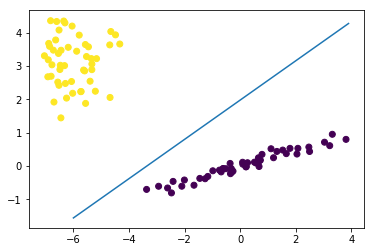

In [174]:
def sigmoid(x):
    # Sigmoid function
    output = 1 / (1 + np.exp(-x))
    return output

def forward(X,W,b):
    # Forward pass with sigmoid activation
    output = np.dot(X,W) + b
    output = sigmoid(output)
    return output

def cross_entropy(y,y_pred):
    # Cross entropy error
    
    # We reshape y first from (n,) to (n,1)
    y = y.reshape(len(y),1)
    
    # We compute the cross entropy
    left = y * np.log(y_pred)
    right = (1-y) * np.log(1 - y_pred)
    loss = -(left + right)
    loss = loss.mean()
    
    return(loss)

def grad_cross_entropy(x,y,y_pred):
    # We get the gradient 
    
    y = y.reshape(len(y),1)
    
    # Gradient for the weight
    grad = -(y - y_pred) * x
    grad = np.mean(grad,axis=0,keepdims=1)
    
    # Gradient for the bias
    grad_b = -(y - y_pred)
    grad_b = np.mean(grad_b)
    
    return(grad,grad_b)

def grad_descent(grad,grad_b,W,b,alpha):
    
    # We update our parameters
    W = W - alpha * grad.T
    b = b - alpha * grad_b
    return(W,b)

# We set the hyperparameters
n_epoch = 2000
alpha = 0.01

for i in range(n_epoch):
    
    # We predict the classes
    y_pred = forward(X,W,b)
    
    # We compute the loss
    loss = cross_entropy(y,y_pred)
    
    # We get the gradients and update our weights
    grad, grad_b = grad_cross_entropy(X,y,y_pred)
    W,b = grad_descent(grad,grad_b,W,b,alpha)
    
    if i % 100 == 0:
        print(f"Epoch {i} with loss : {loss}")

label = (forward(X,W,b) > 0.5).reshape(-1).astype(int)

x = np.arange(-6,4,0.1)
y_x = coord_y(x,W,b)

plt.scatter(X[:,0],X[:,1],c=label)
plt.plot(x,y_x)

In [101]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x) ) )

# Linear prediction
def predict(x,w,b):
    z =  np.matmul(x,w) + b
    y = sigmoid(z)
    return y

In [102]:
def negative_log_likelihood(y, pred):
    left = y * np.log(pred)
    right = (1 - y) * np.log(1-pred)
    loss = -left.mean() - right.mean()
    return loss

In [103]:
def grad(x,y,y_pred):
    
    # Gradient for the weight
    grad = (y_pred - y) * x
    grad = np.mean(grad,axis=0,keepdims=1)
    
    # Gradient for the bias
    grad_b = (y_pred - y)
    grad_b = np.mean(grad_b)
    
    return(grad,grad_b)

In [104]:
def gradient_descent(w, b, grad_w, grad_b,alpha = 0.01):
    w = w - alpha * grad_w
    b = b - alpha * grad_b
    return w, b

In [114]:
predict(X,w,b).shape

(10000, 1)

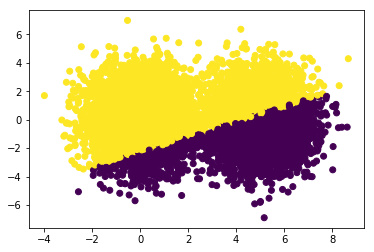

In [110]:
# We initialize randomly our parameters
w = np.random.randn(2,1)
b = np.random.randn(1)

pred = predict(X,w,b)

label = (pred > 0.5).astype(int).reshape(-1)

plt.scatter(X[:,0],X[:,1], c = label)

In [106]:
n_epoch = 2000

for i in range(n_epoch):
    pred = predict(X,w,b)
    
    loss = negative_log_likelihood(y,pred)
    
    grad_w, grad_b = grad(X,y,pred)
    
    w, b = gradient_descent(w,b,grad_w, grad_b,0.01)
    
    if i % 100 == 0:
        print(f"Loss at epoch {i} : {loss}")

Loss at epoch 0 : 0.7654127843575336
Loss at epoch 100 : 0.6409881913477288
Loss at epoch 200 : 0.5352183357778617
Loss at epoch 300 : 0.4493255016817741
Loss at epoch 400 : 0.38285392599825235
Loss at epoch 500 : 0.33353012436153706
Loss at epoch 600 : 0.29787161075309865
Loss at epoch 700 : 0.2722327786955647
Loss at epoch 800 : 0.25361089402803344
Loss at epoch 900 : 0.23986561266255652
Loss at epoch 1000 : 0.22956328910327492
Loss at epoch 1100 : 0.221750226834235
Loss at epoch 1200 : 0.21577972191200237
Loss at epoch 1300 : 0.21120107664339316
Loss at epoch 1400 : 0.20769127166408652
Loss at epoch 1500 : 0.20501272972595935
Loss at epoch 1600 : 0.20298671877261004
Loss at epoch 1700 : 0.20147620235851305
Loss at epoch 1800 : 0.2003744873801455
Loss at epoch 1900 : 0.1995974982637577


(10000,)

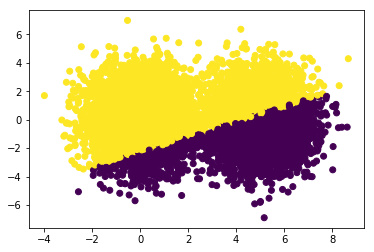

In [118]:
label = (predict(X,w,b) > 0.5).astype(int).reshape(-1)

plt.scatter(X[:,0],X[:,1], c = label)

In [ ]:
mu_1 = (0,0)
scale_1 = np.diag(np.ones(2))
n = 100
x_1 = np.random.normal(loc = mu_1,scale = scale_1)

# Then we sample y
mu_2 = (1,1)
scale_2 = np.diag(np.ones(2))
n = 100
x_2 = np.random.normal(loc = mu_2,scale = scale_2)

# Finally we plot the points
plt.scatter(x,y)